/home/avanluenen
loaded model 1
loaded model 2
loaded model 3
(12, 2)
[[ -8.44536229  14.95826441]
 [ -8.89835266  14.91511353]
 [ 15.620475     5.83919441]
 [ 17.3083912    0.4702587 ]
 [ 16.53103558   0.44772331]
 [  0.30877412  -3.85986485]
 [ -1.00712167 -10.34576576]
 [ -6.16585852  -7.38130751]
 [ -7.73290482  -5.50980947]
 [ -3.36049606  -3.20615116]
 [ -6.30841759  -3.56594031]
 [ -7.8501623   -2.76171528]]
trump_2010 -8.445362289979293 14.958264410803691
trump_2014 -8.898352659827118 14.915113525020434
trump_2018 15.620474998107426 5.839194407403576
obama_2010 17.30839120216346 0.4702586994514315
obama_2014 16.53103557672127 0.44772330590680726
obama_2018 0.30877412364963275 -3.859864848740827
bush_2010 -1.0071216675921089 -10.345765764680715
bush_2014 -6.165858520563593 -7.381307513406356
bush_2018 -7.732904820789089 -5.509809474064526
clinton_2010 -3.3604960560727464 -3.2061511585214437
clinton_2014 -6.308417585721936 -3.565940312211727
clinton_2018 -7.8501623000959135 -2.76

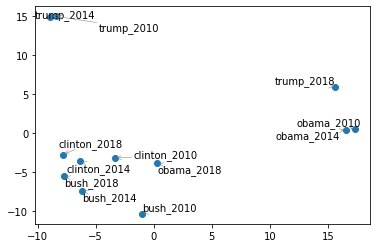

In [14]:
import gensim
from gensim.models.word2vec import Word2Vec
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
import matplotlib.pyplot as plt
import pandas as pd
from adjustText import adjust_text
import os
print(os.getcwd())

model1 = Word2Vec.load("twec/model/2010_1.model")
print("loaded model 1")
model2 = Word2Vec.load("twec/model/2014_1.model")
print("loaded model 2")
model3 = Word2Vec.load("twec/model/2018_1.model")
print("loaded model 3")

models = [model1, model2, model3]
years = {2010:model1, 2014:model2, 2018:model3}

#my_words = ['borstkanker', 'longkanker', 'prostaatkanker', 'darmkanker', 'leukemie', \
#              'kanker']

my_words = ['trump', 'obama', 'bush', 'clinton']

#['cameron', 'may', 'johnson']

my_vocab = {}
for w in my_words:
    for y in years.keys():
        wordyear = w + '_' + str(y)
        my_vocab[wordyear] = years[y].wv[w]
    #my_vocab = {president_2010:emb, president_2014:emb, president_2018:emb}
    
    
df = pd.DataFrame.from_dict(my_vocab, orient='index')
    
x = StandardScaler().fit_transform(df)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
print(principalComponents.shape)
print(principalComponents)

X = principalComponents[:,0]#first column
Y = principalComponents[:,1]#second column

plt.scatter(X, Y)
texts = []
for i, txt in enumerate(my_vocab.keys()):
    print(txt, X[i], Y[i])
    #plt.annotate(txt, (X[i], Y[i]))
    texts.append(plt.text(X[i], Y[i], txt))

adjust_text(texts, only_move={'points':'y', 'texts':'y'}, arrowprops=dict(arrowstyle="->", color='gray', lw=0.5))

plt.savefig("METHODtemporalwembexample")
plt.show()

man 1 1
woman 2 2
king 2 3
queen 3 4


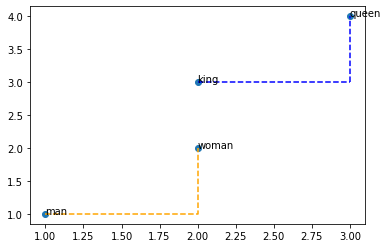

In [11]:
import matplotlib.pyplot as plt
#import pandas as pd
#from adjustText import adjust_text
#import os
#print(os.getcwd())

words = ['man', 'woman', 'king', 'queen']
X = [1, 2, 2, 3]
Y = [1, 2, 3, 4]

plt.scatter(X, Y)

#texts = []
for i, txt in enumerate(words):
    print(txt, X[i], Y[i])
    plt.annotate(txt, (X[i], Y[i]))
    #texts.append(plt.text(X[i], Y[i], txt))

#adjust_text(texts, only_move={'points':'y', 'texts':'y'}, arrowprops=dict(arrowstyle="->", color='gray', lw=0.5))
#man = #[1, 1]
#woman = [2, 2]
#inbetween1 = [2, 1]
x1 = [1, 2, 2]
y1 = [1, 1, 2]
king = [2, 3]
queen = [3, 4]
inbetween2 = [3, 3]

plt.plot(x1, y1, '--', color='orange')
#plt.plot(inbetween1, woman, '--', color='orange')
plt.plot(king, inbetween2, '--', color='blue')
plt.plot(inbetween2, queen, '--', color='blue')


plt.savefig("BACKGROUNDmanwomankingqueen")
plt.show()